In [2]:
# 1.Choose a binary classification dataset.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer 

data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# 2.Train/test split and standardize features.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [4]:
# 3.Fit a Logistic Regression model.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Confusion Matrix:
 [[41  2]
 [ 1 70]]
Precision: 0.97, Recall: 0.99
ROC-AUC: 1.00


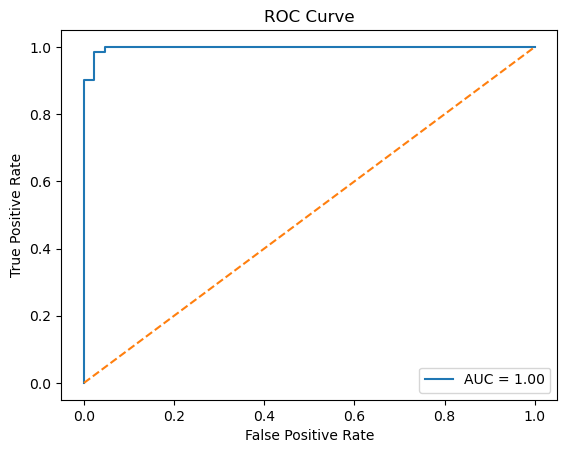

In [5]:
# 4.Evaluate with confusion matrix, precision, recall, ROC-AUC.

from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities and classes
y_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [6]:
# 5.Tune threshold and explain sigmoid function.


# Tune threshold manually
custom_threshold = 0.3
y_custom = (y_proba >= custom_threshold).astype(int)

# New evaluation
cm_custom = confusion_matrix(y_test, y_custom)
precision_custom = precision_score(y_test, y_custom)
recall_custom = recall_score(y_test, y_custom)

print(f"\nWith threshold = {custom_threshold}")
print("Confusion Matrix:\n", cm_custom)
print(f"Precision: {precision_custom:.2f}, Recall: {recall_custom:.2f}")



With threshold = 0.3
Confusion Matrix:
 [[41  2]
 [ 0 71]]
Precision: 0.97, Recall: 1.00
